In [28]:
import pandas as pd
import numpy as np
import math
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
import xgboost as xgb
from xgboost import XGBRegressor
from xgboost import XGBClassifier

from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from datetime import datetime
from sklearn.metrics import classification_report, confusion_matrix


from sklearn.inspection import permutation_importance
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from skfeature.function.similarity_based import fisher_score
from sklearn.feature_selection import VarianceThreshold
from kydavra import MultiSURFSelector
from sklearn.feature_selection import RFE

import eli5
from eli5.sklearn import PermutationImportance
from eli5.permutation_importance import get_score_importances
from sklearn.feature_selection import SelectFromModel

from boruta import BorutaPy

import shap

import statistics

# create the random forest model.
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier


from sklearn.preprocessing import StandardScaler

# from sklearn.experimental import enable_halving_search_cv  # noqa
# from sklearn.model_selection import HalvingGridSearchCV
from boruta import BorutaPy
import random
from sklearn.feature_selection import mutual_info_classif as MIC
from functools import reduce

import matplotlib.pyplot as plt

In [2]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [3]:
# for threshold
def filter_arr(sample_arr, filter_index):
    result_val = sample_arr[filter_index]
    result_index = filter_index
    compare_index = filter_index + 1
    
    if (len(sample_arr) -1 == filter_index):
        compare_index = filter_index - 1
    
    if (sample_arr[filter_index] == sample_arr[compare_index]):
        for index, val in enumerate(sample_arr):
            if (val == result_val):
                result_val = sample_arr[index - 1]
                result_index = index - 1

    return (result_val, result_index)



In [4]:
def categorise(row):  
    if row['Overall Probability'] >= 0.8 :
        return 1
    else:
        return 0

In [5]:
def crossvalidresults(model,X,y):
    rfc_cv_score = cross_val_score(model, X, y, cv=10)
    rfc_cv_f1 = cross_val_score(model, X, y, scoring="f1", cv = 10).mean()
    rfc_cv_f1sd = cross_val_score(model, X, y, scoring="f1", cv = 10).std()
    print("=== Mean F1 Score ===")
    print("Mean F1 Score - : ", rfc_cv_f1)
    print("=== sd F1 Score ===")
    print("sd F1 Score - : ", rfc_cv_f1sd)
    print('\n')

In [6]:
pd.set_option('display.max_columns', None)

In [7]:
# from sklearn.datasets import load_breast_cancer
# cancer = load_breast_cancer()
# df1 = pd.DataFrame(np.c_[cancer['data'], cancer['target']],
#                   columns= np.append(cancer['feature_names'], ['class']))
# df1


# https://www.kaggle.com/datasets/mathchi/diabetes-data-set
df1 = pd.read_csv('diabetes.csv', header=0)
df1 = df1.rename(columns = {'Outcome':'class'})
# df1 = df1.drop(columns=['Age','Gender'])
# df1['class'] = df1['class'].astype(str)
df1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [8]:
df11 = df1.copy()
df11.index = np.arange(1, len(df1) + 1)
df11.index.name='i'
df11

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,class
i,,,,,,,,,
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
764,10,101,76,48,180,32.9,0.171,63,0
765,2,122,70,27,0,36.8,0.340,27,0
766,5,121,72,23,112,26.2,0.245,30,0


In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   class                     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
# df1['class'] = df1.apply(lambda row: categorise(row), axis=1)
print('class 0 = ',df1['class'].value_counts()[0],'ตัว')
print('class 1 = ',df1['class'].value_counts()[1],'ตัว')
print('Majority Class= ', df1['class'].value_counts()[0]/len(df1))

class 0 =  500 ตัว
class 1 =  268 ตัว
Majority Class=  0.6510416666666666


In [11]:
# threshold:

log_2base = math.log(len(df1),2.0)
thres_base2n = int(round(log_2base,0))
thres_p2_5 = int(round(len(df1.columns)*0.025,0))
thres_p5 =  int(round(len(df1.columns)*0.05,0))
thres_p10 =  int(round(len(df1.columns)*0.1,0))
thres_p20 =  int(round(len(df1.columns)*0.2,0))

print('treshold logbase2(n):', thres_base2n)
print('treshold 2.5%:',thres_p2_5)
print('treshold 5%:',thres_p5)
print('treshold 10%:',thres_p10)
print('treshold 20%:',thres_p20)


treshold logbase2(n): 10
treshold 2.5%: 0
treshold 5%: 0
treshold 10%: 1
treshold 20%: 2


In [12]:
X_ = df1.drop(['class'], axis=1)
len(X_.columns)

8

In [13]:
paramXGBoost_grid1 = {"subsample":[0.5, 0.75, 1],
              "colsample_bytree":[0.5, 0.75, 1],
              "max_depth":[5, 6, 7],
              "min_child_weight":[1,5,15],
              "learning_rate":[0.1, 0.01, 0.05],
              'eta': [0.01, 0.015, 0.02]
    }

In [14]:
paramXGBoost_grid2 = {"subsample":[0.2,0.6,0.9],
              "colsample_bytree":[0.5, 0.75, 1],
              "max_depth":[7,15,25],
              "min_child_weight":[0.1,0.5,1],
              "learning_rate":[0.1, 0.01, 0.05],
              'eta': [0.01, 0.015, 0.02]
    }

In [15]:
paramXGBoost_grid3 = {"subsample":[0.2,0.6,0.9],
              "colsample_bytree":[0.1,0.25, 0.5],
              "max_depth":[10,15,20],
              "min_child_weight":[20,40,60],
              "learning_rate":[0.1, 0.01, 0.05],
              'eta': [0.01, 0.015, 0.02]
    }

In [16]:
paramXGBoost_grid4 = {"subsample":[0.75,0.9,1],
              "colsample_bytree":[0.1,0.25, 0.5],
              "max_depth":[5,10,15],
              "min_child_weight":[5,10,20],
              "learning_rate":[0.1, 0.01, 0.05],
              'eta': [0.01, 0.015, 0.02]
    }

# XGBoost

In [19]:
# baseline model

# X = df1.drop(['class'], axis=1)
# y = df1['class']
# # standardization 
# object= StandardScaler()
# X = object.fit_transform(X) 


X_train = df1.drop(['class'], axis=1)
y_train = df1['class']
# standardization 
object= StandardScaler()
X_train = object.fit_transform(X_train) 


# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123) 

# random forest model creation
xgbc = XGBClassifier(random_state=123)
xgbc.fit(X_train,y_train)

print('\n')

# #result
# crossvalidresults(model=rfc,X=X,y=y)

## results F1 and stdF1 ##
avgF1_baselineXGBoost = cross_val_score(xgbc, X_train, y_train, scoring="f1", cv = 10).mean() ##<3## 
stdF1_baselineXGBoost = cross_val_score(xgbc, X_train,y_train, scoring="f1", cv = 10).std() ##<3##
print('Mean F1 Score: ', avgF1_baselineXGBoost)
print('std F1 Score: ', stdF1_baselineXGBoost)





Mean F1 Score:  0.6034695413356548
std F1 Score:  0.07341998359461285


In [20]:
pd.DataFrame(data=X)

NameError: name 'X' is not defined

In [21]:
n_baselineXGBoost = len(X_.columns)
n_baselineXGBoost

8

In [22]:
# tuned baseline model_ parameterset1 

start_time = timer(None)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = xgbc, param_grid = paramXGBoost_grid1,
                           cv = 5, n_jobs = -1, verbose = 2,scoring='f1')
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

timer(start_time)
print(grid_search.best_params_)


xgbc_tuned1 = XGBClassifier(subsample=grid_search.best_params_['subsample'],
                                   max_depth=grid_search.best_params_['max_depth'],
                                   colsample_bytree=grid_search.best_params_['colsample_bytree'],
                                   min_child_weight=grid_search.best_params_['min_child_weight'],
                                   learning_rate=grid_search.best_params_['learning_rate'],
                                   eta=grid_search.best_params_['eta'])
xgbc_tuned1.fit(X_train,y_train)

print('\n')

## results F1 and stdF1 ##
avgF1set1_baselineXGBoost = cross_val_score(xgbc_tuned1, X_train, y_train, scoring="f1", cv = 10).mean() ##<3## 
stdF1set1_baselineXGBoost = cross_val_score(xgbc_tuned1, X_train, y_train, scoring="f1", cv = 10).std() ##<3##
print('Mean F1 Score: ', avgF1set1_baselineXGBoost)
print('std F1 Score: ', stdF1set1_baselineXGBoost)

Fitting 5 folds for each of 729 candidates, totalling 3645 fits

 Time taken: 0 hours 0 minutes and 39.56 seconds.
{'colsample_bytree': 0.75, 'eta': 0.01, 'learning_rate': 0.05, 'max_depth': 6, 'min_child_weight': 1, 'subsample': 0.75}


Mean F1 Score:  0.6480248884265751
std F1 Score:  0.06084951894625638


In [23]:
# tuned baseline model_ parameterset2

start_time = timer(None)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = xgbc, param_grid = paramXGBoost_grid2,
                           cv = 5, n_jobs = -1, verbose = 2,scoring='f1')
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

timer(start_time)
print(grid_search.best_params_)


xgbc_tuned2 = XGBClassifier(subsample=grid_search.best_params_['subsample'],
                                   max_depth=grid_search.best_params_['max_depth'],
                                   colsample_bytree=grid_search.best_params_['colsample_bytree'],
                                   min_child_weight=grid_search.best_params_['min_child_weight'],
                                   learning_rate=grid_search.best_params_['learning_rate'],
                                   eta=grid_search.best_params_['eta'])
xgbc_tuned2.fit(X_train,y_train)

print('\n')

## results F1 and stdF1 ##
avgF1set2_baselineXGBoost = cross_val_score(xgbc_tuned2, X_train, y_train, scoring="f1", cv = 10).mean() ##<3## 
stdF1set2_baselineXGBoost = cross_val_score(xgbc_tuned2, X_train, y_train, scoring="f1", cv = 10).std() ##<3##
print('Mean F1 Score: ', avgF1set2_baselineXGBoost)
print('std F1 Score: ', stdF1set2_baselineXGBoost)

Fitting 5 folds for each of 729 candidates, totalling 3645 fits

 Time taken: 0 hours 0 minutes and 55.43 seconds.
{'colsample_bytree': 1, 'eta': 0.01, 'learning_rate': 0.1, 'max_depth': 25, 'min_child_weight': 0.1, 'subsample': 0.6}


Mean F1 Score:  0.6260749904678187
std F1 Score:  0.08400761994994795


In [24]:
# tuned baseline model_ parameterset3

start_time = timer(None)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = xgbc, param_grid = paramXGBoost_grid3,
                           cv = 5, n_jobs = -1, verbose = 2,scoring='f1')
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

timer(start_time)
print(grid_search.best_params_)


xgbc_tuned3 = XGBClassifier(subsample=grid_search.best_params_['subsample'],
                                   max_depth=grid_search.best_params_['max_depth'],
                                   colsample_bytree=grid_search.best_params_['colsample_bytree'],
                                   min_child_weight=grid_search.best_params_['min_child_weight'],
                                   learning_rate=grid_search.best_params_['learning_rate'],
                                   eta=grid_search.best_params_['eta'])
xgbc_tuned3.fit(X_train,y_train)

print('\n')

## results F1 and stdF1 ##
avgF1set3_baselineXGBoost = cross_val_score(xgbc_tuned3, X_train, y_train, scoring="f1", cv = 10).mean() ##<3## 
stdF1set3_baselineXGBoost = cross_val_score(xgbc_tuned3,X_train, y_train, scoring="f1", cv = 10).std() ##<3##
print('Mean F1 Score: ', avgF1set3_baselineXGBoost)
print('std F1 Score: ', stdF1set3_baselineXGBoost)

Fitting 5 folds for each of 729 candidates, totalling 3645 fits

 Time taken: 0 hours 0 minutes and 16.71 seconds.
{'colsample_bytree': 0.5, 'eta': 0.01, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 20, 'subsample': 0.9}


Mean F1 Score:  0.6080658981874112
std F1 Score:  0.0861486627833891


In [25]:
# tuned baseline model_ parameterset4

start_time = timer(None)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = xgbc, param_grid = paramXGBoost_grid4,
                           cv = 5, n_jobs = -1, verbose = 2,scoring='f1')
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

timer(start_time)
print(grid_search.best_params_)


xgbc_tuned4 = XGBClassifier(subsample=grid_search.best_params_['subsample'],
                                   max_depth=grid_search.best_params_['max_depth'],
                                   colsample_bytree=grid_search.best_params_['colsample_bytree'],
                                   min_child_weight=grid_search.best_params_['min_child_weight'],
                                   learning_rate=grid_search.best_params_['learning_rate'],
                                   eta=grid_search.best_params_['eta'])
xgbc_tuned4.fit(X_train,y_train)

## results F1 and stdF1 ##
avgF1set4_baselineXGBoost = cross_val_score(xgbc_tuned4,X_train, y_train, scoring="f1", cv = 10).mean() ##<3## 
stdF1set4_baselineXGBoost = cross_val_score(xgbc_tuned4,X_train, y_train, scoring="f1", cv = 10).std() ##<3##
print('Mean F1 Score: ', avgF1set4_baselineXGBoost)
print('std F1 Score: ', stdF1set4_baselineXGBoost)

Fitting 5 folds for each of 729 candidates, totalling 3645 fits

 Time taken: 0 hours 0 minutes and 24.54 seconds.
{'colsample_bytree': 0.5, 'eta': 0.01, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 10, 'subsample': 0.75}
Mean F1 Score:  0.6102317417890034
std F1 Score:  0.09064759964058035


## Feature Selection

# Filter

In [72]:
# Mutual Information: Filter method
# Mutual Information: Filter method
start_time = timer(None)
# mi_XGBoostscore = MIC(X_train,y_train)
mi_XGBoostscore = MIC(X,y)
mi_XGBoostfeatures = pd.DataFrame({'Feature':list(X_.columns),
                            'value_MI':mi_XGBoostscore})
mi_XGBoostfeatures['value_MI'] = mi_XGBoostfeatures['value_MI'].map('{:,.19f}'.format)
""" the more Mutual Information is the more feature importance it will have"""
mi_XGBoostfeatures = mi_XGBoostfeatures.sort_values(by='value_MI',ascending=True)
mi_XGBoostfeatures = mi_XGBoostfeatures.set_index('Feature')
timer(start_time)
mi_XGBoostfeatures['value_MI'] = mi_XGBoostfeatures['value_MI'].astype(float)
mi_XGBoostfeatures


 Time taken: 0 hours 0 minutes and 0.03 seconds.


,value_MI
Feature,
DiabetesPedigreeFunction,0.011300
BloodPressure,0.011355
SkinThickness,0.016193
Pregnancies,0.022736
Insulin,0.034460
Age,0.062345
BMI,0.065772
Glucose,0.112988


In [ ]:
from matplotlib import pyplot as plt
import matplotlib

# fig = plt.figure()

# plt.gcf().set_size_inches(18,6)
# matplotlib.rc('font', size=8)
# plt.show()


ax.xaxis.grid(False) # adding vertical grid lines
ax2 = ax.twinx() # Creating the right hand side y axis
ax_lim = ax.get_ylim()
ax2_lim = (ax_lim[0], ax_lim[1]) # Aligning the limits of both y axes
ax2.set_ylim(ax2_lim)
# ax2.set_yticks(range(0, len(y)))
ax2.set_yticklabels(alternativeYlabels[::-1]) # Reverses the list
ax2.set_ylabel("# enrolled in each course",rotation = 270, labelpad=15)

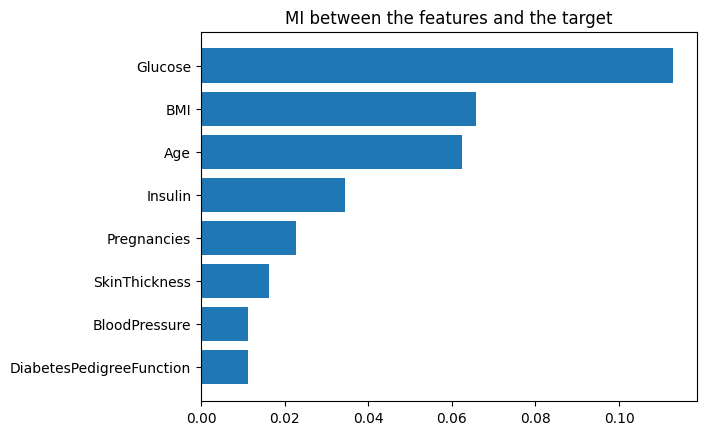

In [73]:
# Initialize parameters as in your post
import matplotlib.pyplot as plt



# This time draw the bar plot from an 'axes' object
ax1 = plt.subplot(111)
ax1.barh(mi_XGBoostfeatures.index,mi_XGBoostfeatures['value_MI'])



# Add a title and show figure
plt.title('MI between the features and the target')
plt.show()

In [32]:
# built-in Feature Importance: Embedded mehod
start_time = timer(None)
embed_XGBoostfeatures = pd.DataFrame({'Feature':list(X_.columns),
                                 'value_embed':xgbc_tuned1.feature_importances_}) #### changeherepearl
embed_XGBoostfeatures['value_embed'] = embed_XGBoostfeatures['value_embed'].map('{:,.2f}'.format)
embed_XGBoostfeatures = embed_XGBoostfeatures.sort_values(by=['value_embed'],ascending=True)
embed_XGBoostfeatures = embed_XGBoostfeatures.set_index('Feature')

timer(start_time)
embed_XGBoostfeatures


 Time taken: 0 hours 0 minutes and 0.0 seconds.


,value_embed
Feature,
SkinThickness,0.08
BloodPressure,0.09
Pregnancies,0.10
Insulin,0.10
DiabetesPedigreeFunction,0.10
Age,0.13
BMI,0.14
Glucose,0.25


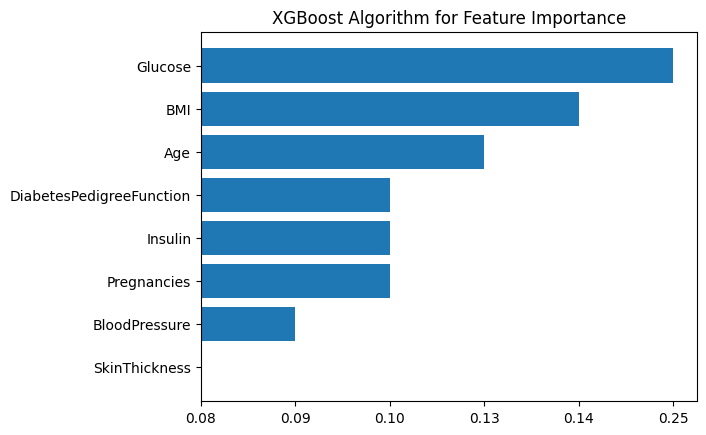

In [33]:
# This time draw the bar plot from an 'axes' object
ax1 = plt.subplot(111)
ax1.barh(embed_XGBoostfeatures.index,embed_XGBoostfeatures['value_embed'])



# Add a title and show figure
plt.title('XGBoost Algorithm for Feature Importance')
plt.show()